<a href="https://colab.research.google.com/github/sanyamjain789523/personalProjects/blob/main/MLProjectReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'\house_national_forecast.csv')

In [ ]:
df.head()

,forecastdate,state,party,model,win_probability,mean_seats,median_seats,p10_seats,p90_seats,margin,p10_margin,p90_margin
0,2018-08-01,US,D,classic,0.7719,231.37,230.0,210.0,255.0,7.84,3.53,12.26
1,2018-08-01,US,R,classic,0.2281,203.63,205.0,180.0,225.0,-7.84,-3.53,-12.26
2,2018-08-02,US,D,classic,0.7431,229.86,228.0,209.0,254.0,7.51,3.24,12.01
3,2018-08-02,US,R,classic,0.2569,205.14,207.0,181.0,226.0,-7.51,-3.24,-12.01
4,2018-08-03,US,D,classic,0.7440,229.83,228.0,209.0,253.0,7.52,3.27,11.95


In [ ]:
df.columns

Index(['forecastdate', 'state', 'party', 'model', 'win_probability',
       'mean_seats', 'median_seats', 'p10_seats', 'p90_seats', 'margin',
       'p10_margin', 'p90_margin'],
      dtype='object')

In [ ]:
df.shape

(588, 12)

In [ ]:
len(df.forecastdate.unique())

98

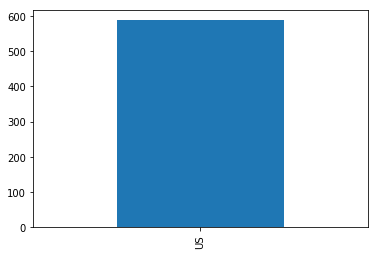

In [ ]:
df.state.value_counts().plot.bar()

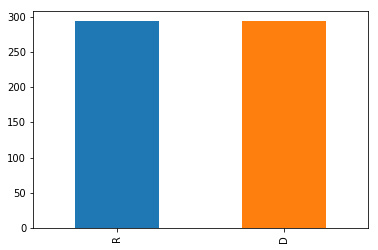

In [ ]:
df.party.value_counts().plot.bar()

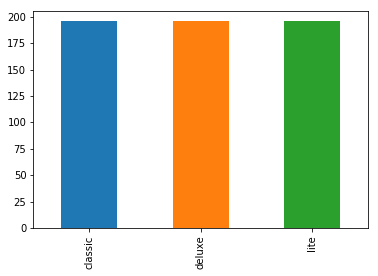

In [ ]:
df.model.value_counts().plot.bar()

In [ ]:
df.describe()

,win_probability,mean_seats,median_seats,p10_seats,p90_seats,margin,p10_margin,p90_margin
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,0.500000,217.500034,217.500000,196.562925,238.437075,0.000000,0.000000,0.000000
std,0.256316,12.118312,10.552941,13.309715,13.309715,8.393721,4.325636,12.543046
min,0.120800,199.780000,201.000000,175.000000,219.000000,-10.210000,-6.270000,-14.280000
25%,0.246350,205.590000,207.000000,184.000000,225.000000,-8.297500,-4.202500,-12.330000
50%,0.500000,217.500000,217.500000,196.500000,238.500000,0.000000,0.000000,0.000000
75%,0.753650,229.410000,228.000000,210.000000,251.000000,8.297500,4.202500,12.330000
max,0.879200,235.220000,234.000000,216.000000,260.000000,10.210000,6.270000,14.280000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["party"] = le.fit_transform(df["party"])
df["model"] = le.fit_transform(df["model"])


In [ ]:
df = df.drop(['forecastdate','state'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 10 columns):
party              588 non-null int32
model              588 non-null int32
win_probability    588 non-null float64
mean_seats         588 non-null float64
median_seats       588 non-null float64
p10_seats          588 non-null float64
p90_seats          588 non-null float64
margin             588 non-null float64
p10_margin         588 non-null float64
p90_margin         588 non-null float64
dtypes: float64(8), int32(2)
memory usage: 41.4 KB


In [ ]:
# df["Percent"]  = df["Percent"].apply(lambda x: (float(str(x).replace("%",""))))

In [ ]:
# df = df.reset_index(drop = True)

In [ ]:
x_less = df.drop(["win_probability"],axis = 1)
y_less = df["win_probability"]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit with less data and plot
model.fit(x_less, y_less)
predicted_less = model.predict(x_less)
# plot(x_less, y_less, predicted_less)

In [ ]:
model.score(x_less, y_less)

0.9979070829006365

In [ ]:
model.predict([x_less.iloc[0,:]])

array([0.77276034])